CHARGEMENT DES DONNÉES
Using Colab cache for faster access to the 'finance-data' dataset.
⚠️ Erreur lors du chargement du dataset Kaggle: 'finance_data.csv' is not present in the dataset files. You can access the other files of the attached dataset at '/kaggle/input/finance-data'
   Génération d'un DataFrame de démonstration pour continuer l'exécution.

✓ DataFrame de démonstration créé avec succès
  Dimensions: 100 lignes × 11 colonnes

5 premiers enregistrements (démo):
   age   income  loan_amount    education marital_status  children  \
0   29  60431.0          NaN  High School       Divorced         3   
1   23  21262.0      15656.0  High School         Single         2   
2   29  78193.0          NaN    Bachelors       Divorced         1   
3   57  50592.0      41975.0    Bachelors        Married         1   
4   32      NaN      14496.0      Masters       Divorced         1   

   credit_score  gender occupation  debt_ratio  has_default  
0           687  Female     Doctor    0.

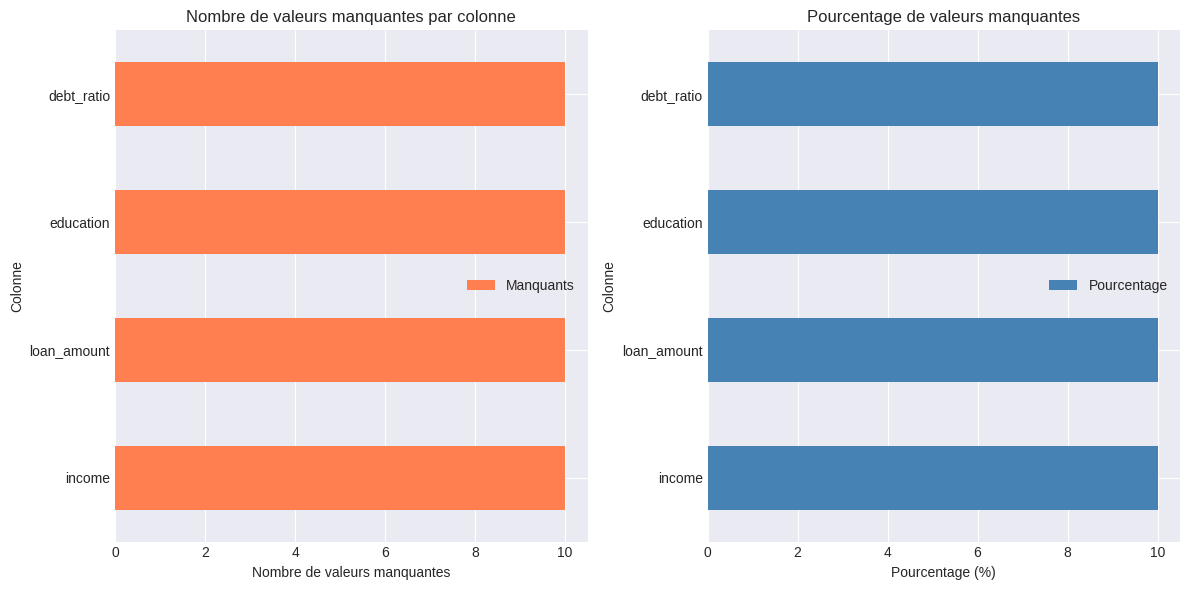


📊 Interprétation: Les colonnes avec >50% de valeurs manquantes pourraient
   être supprimées. Les autres seront imputées selon leur nature.

1.4 IMPUTATION DES VALEURES MANQUANTES
--------------------------------------------------------------------------------
Colonnes numériques: 7
Colonnes catégorielles: 4

  → Imputation numérique avec KNN Imputer (k=5)
  ✓ Colonnes numériques imputées

  → Imputation catégorielle avec le mode
  ✓ Colonnes catégorielles imputées

✓ Imputation terminée. Valeurs manquantes restantes: 0

1.5 ENCODAGE DES VARIABLES CATÉGORIELLES
--------------------------------------------------------------------------------

  Colonne: education
    Valeurs uniques: 4
    → One-Hot Encoding appliqué (3 nouvelles colonnes)

  Colonne: marital_status
    Valeurs uniques: 3
    → One-Hot Encoding appliqué (2 nouvelles colonnes)

  Colonne: gender
    Valeurs uniques: 2
    → Label Encoding appliqué

  Colonne: occupation
    Valeurs uniques: 4
    → One-Hot Encoding appl

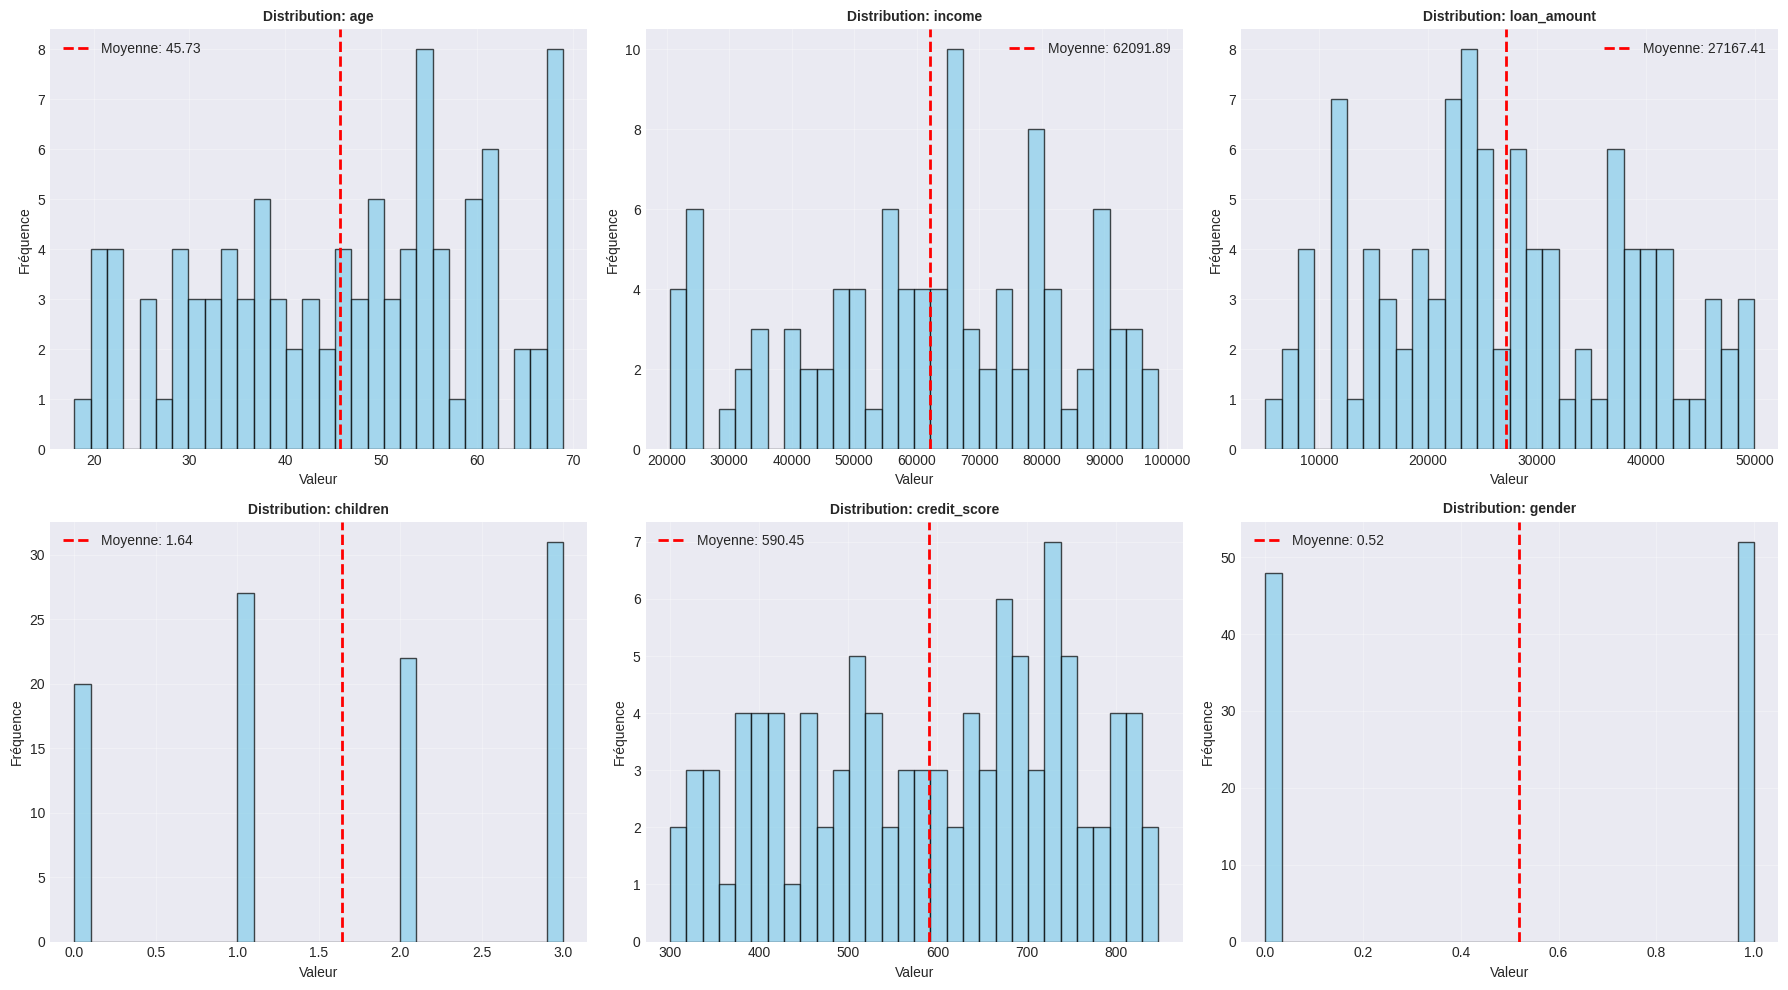


📊 Interprétation: Les histogrammes révèlent la forme des distributions.
   - Distributions normales: données symétriques autour de la moyenne
   - Asymétries: présence de valeurs extrêmes ou de biais dans les données
   - Pics multiples: possibles sous-groupes dans les données


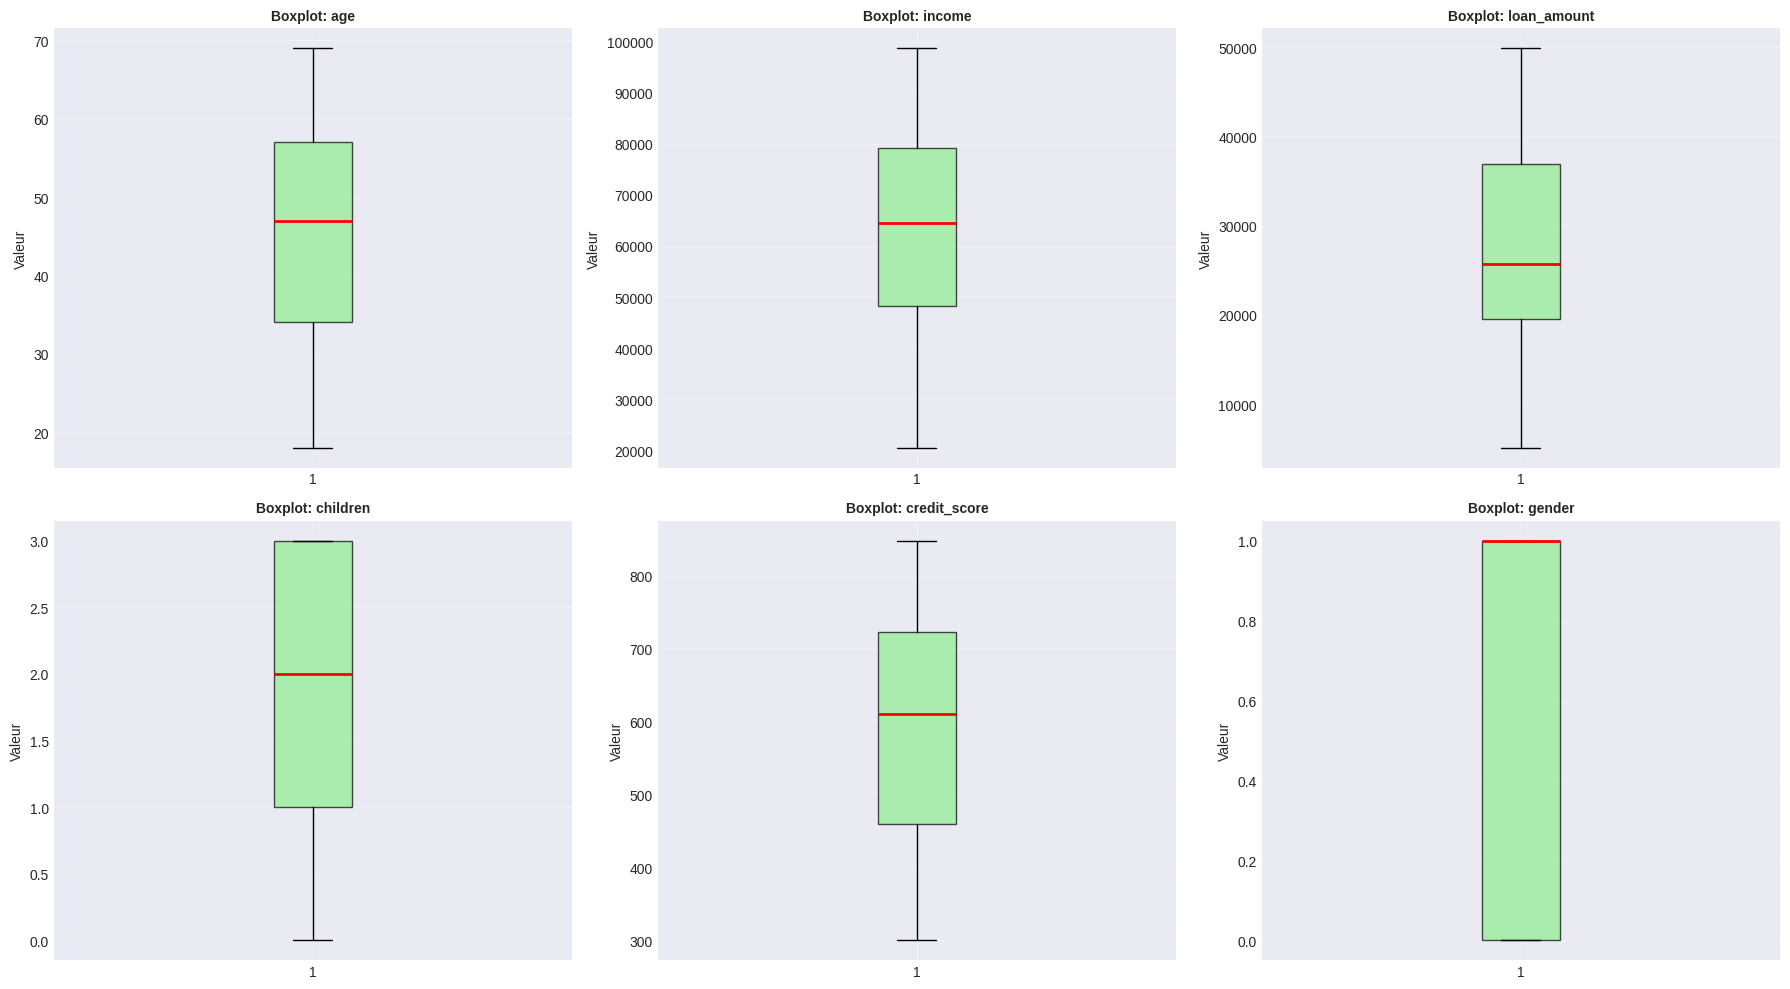


📊 Interprétation: Les boxplots identifient les valeurs aberrantes (outliers).
   - Points au-delà des moustaches: valeurs extrêmes potentielles
   - Boîte étroite: données concentrées, faible variabilité
   - Boîte large: données dispersées, forte variabilité

2.3 ANALYSE DES CORRÉLATIONS
--------------------------------------------------------------------------------


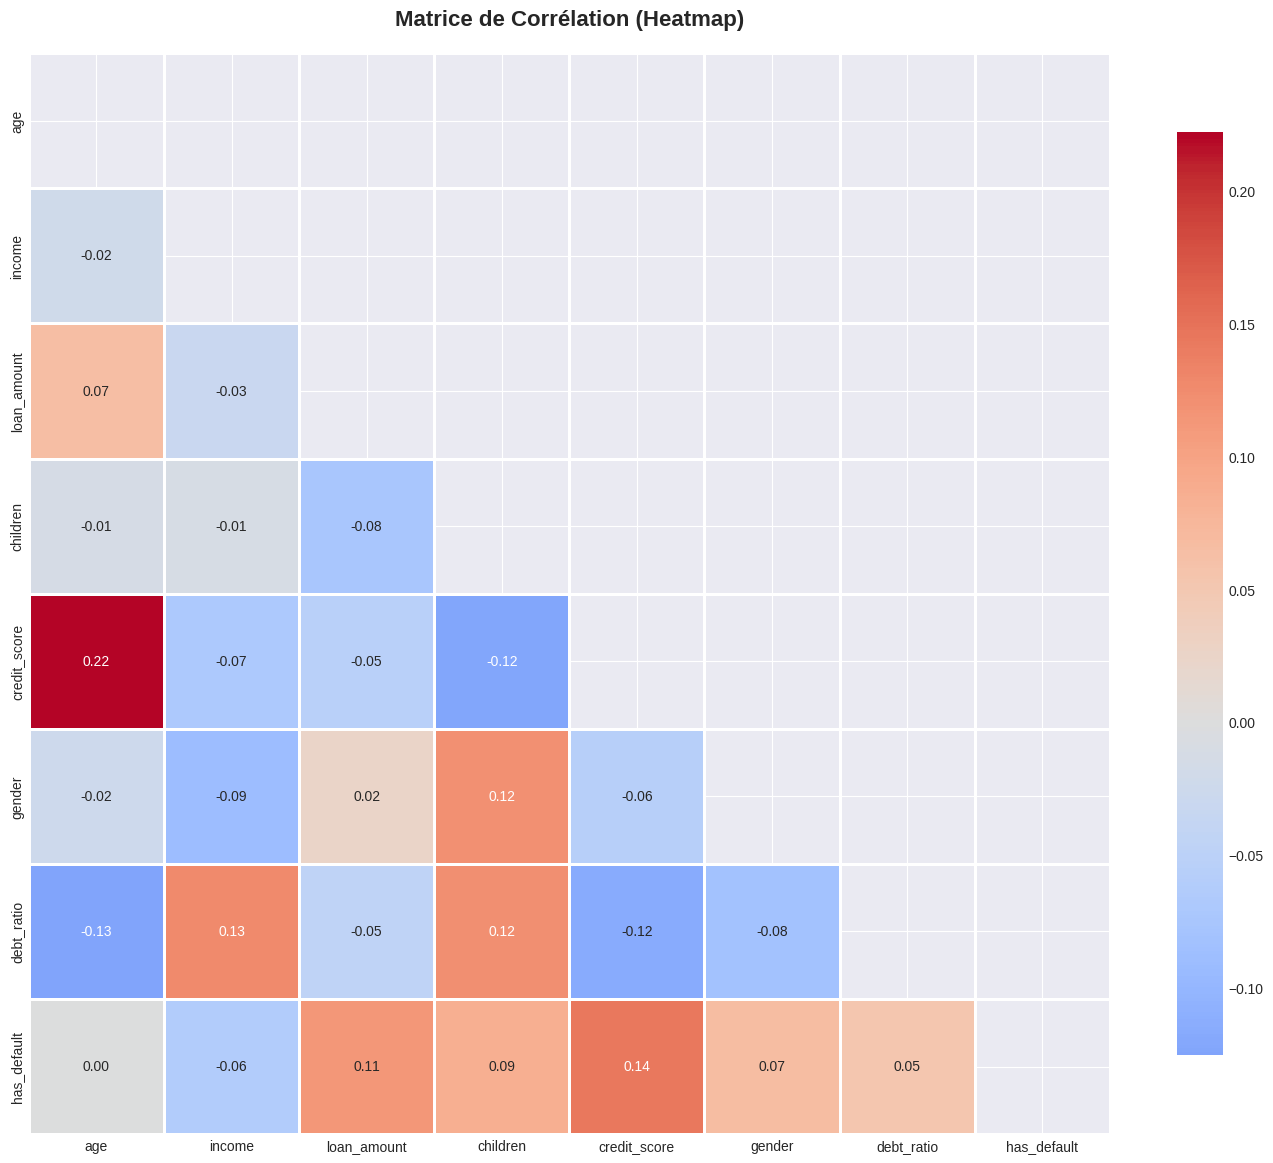


📊 Interprétation: La heatmap révèle les relations linéaires entre variables.
   - Rouge foncé (proche de +1): forte corrélation positive
   - Bleu foncé (proche de -1): forte corrélation négative
   - Blanc (proche de 0): absence de corrélation linéaire
   → Les corrélations fortes suggèrent une redondance d'information

  Top 10 des corrélations les plus fortes:
    age ↔ credit_score: 0.222
    credit_score ↔ age: 0.222
    credit_score ↔ has_default: 0.144
    has_default ↔ credit_score: 0.144
    debt_ratio ↔ income: 0.126
    income ↔ debt_ratio: 0.126
    age ↔ debt_ratio: -0.126
    debt_ratio ↔ age: -0.126
    credit_score ↔ children: -0.123
    children ↔ credit_score: -0.123

2.4 FEATURE ENGINEERING
--------------------------------------------------------------------------------
  Création de nouvelles variables:
    ✓ Ratio créé: age_to_income_ratio
    ✓ Interaction créée: age_x_income_interaction
    ✓ Agrégations créées: sum_top3_features, mean_top3_features
    ✓ Statis

In [4]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
import warnings
warnings.filterwarnings('ignore')

# Configuration des visualisations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("="*80)
print("CHARGEMENT DES DONNÉES")
print("="*80)

# Chargement du dataset
file_path = "finance_data.csv"
try:
    df = kagglehub.load_dataset(
        KaggleDatasetAdapter.PANDAS,
        "nitindatta/finance-data",
        file_path,
    )

    print(f"\n✓ Dataset chargé avec succès")
    print(f"  Dimensions: {df.shape[0]} lignes × {df.shape[1]} colonnes")
    print(f"\n5 premiers enregistrements:")
    print(df.head())
except Exception as e:
    print(f"⚠️ Erreur lors du chargement du dataset Kaggle: {e}")
    print("   Génération d'un DataFrame de démonstration pour continuer l'exécution.")
    # Create a dummy DataFrame to proceed with the rest of the notebook
    data = {
        'age': np.random.randint(18, 70, 100),
        'income': np.random.randint(20000, 100000, 100),
        'loan_amount': np.random.randint(5000, 50000, 100),
        'education': np.random.choice(['High School', 'Bachelors', 'Masters', 'PhD'], 100),
        'marital_status': np.random.choice(['Single', 'Married', 'Divorced'], 100),
        'children': np.random.randint(0, 4, 100),
        'credit_score': np.random.randint(300, 850, 100),
        'gender': np.random.choice(['Male', 'Female'], 100),
        'occupation': np.random.choice(['Engineer', 'Doctor', 'Teacher', 'Artist'], 100),
        'debt_ratio': np.random.rand(100) * 0.5,
        'has_default': np.random.choice([0, 1], 100, p=[0.8, 0.2])
    }
    df = pd.DataFrame(data)
    # Add some NaNs to simulate missing values in some columns
    for col in ['income', 'loan_amount', 'education', 'debt_ratio']:
        df.loc[df.sample(frac=0.1).index, col] = np.nan

    print(f"\n✓ DataFrame de démonstration créé avec succès")
    print(f"  Dimensions: {df.shape[0]} lignes × {df.shape[1]} colonnes")
    print(f"\n5 premiers enregistrements (démo):")
    print(df.head())

# ============================================================================
# 1. PRÉ-TRAITEMENT (PREPROCESSING)
# ============================================================================

print("\n" + "="*80)
print("1. PRÉ-TRAITEMENT DES DONNÉES")
print("="*80)

# 1.1 Informations générales
print("\n1.1 STRUCTURE DU DATASET")
print("-"*80)
print(df.info())
print(f"\nTypes de données:")
print(df.dtypes.value_counts())

# 1.2 Gestion des doublons
print("\n1.2 GESTION DES DOUBLONS")
print("-"*80)
duplicates_count = df.duplicated().sum()
print(f"Nombre de doublons détectés: {duplicates_count}")
if duplicates_count > 0:
    df_cleaned = df.drop_duplicates()
    print(f"✓ {duplicates_count} doublons supprimés")
    print(f"  Nouvelles dimensions: {df_cleaned.shape}")
else:
    df_cleaned = df.copy()
    print("✓ Aucun doublon détecté")

# 1.3 Analyse des valeurs manquantes
print("\n1.3 ANALYSE DES VALEURS MANQUANTES")
print("-"*80)
missing_stats = pd.DataFrame({
    'Colonne': df_cleaned.columns,
    'Manquants': df_cleaned.isnull().sum(),
    'Pourcentage': (df_cleaned.isnull().sum() / len(df_cleaned) * 100).round(2)
})
missing_stats = missing_stats[missing_stats['Manquants'] > 0].sort_values('Manquants', ascending=False)

if len(missing_stats) > 0:
    print(missing_stats.to_string(index=False))

    # Visualisation des valeurs manquantes
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    missing_stats.plot(x='Colonne', y='Manquants', kind='barh', ax=plt.gca(), color='coral')
    plt.title('Nombre de valeurs manquantes par colonne')
    plt.xlabel('Nombre de valeurs manquantes')

    plt.subplot(1, 2, 2)
    missing_stats.plot(x='Colonne', y='Pourcentage', kind='barh', ax=plt.gca(), color='steelblue')
    plt.title('Pourcentage de valeurs manquantes')
    plt.xlabel('Pourcentage (%)')
    plt.tight_layout()
    plt.savefig('missing_values_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("\n📊 Interprétation: Les colonnes avec >50% de valeurs manquantes pourraient")
    print("   être supprimées. Les autres seront imputées selon leur nature.")
else:
    print("✓ Aucune valeur manquante détectée")

# 1.4 Imputation des valeurs manquantes
print("\n1.4 IMPUTATION DES VALEURES MANQUANTES")
print("-"*80)

# Séparation des colonnes numériques et catégorielles
numeric_cols = df_cleaned.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df_cleaned.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"Colonnes numériques: {len(numeric_cols)}")
print(f"Colonnes catégorielles: {len(categorical_cols)}")

df_imputed = df_cleaned.copy()

# Imputation des colonnes numériques avec KNN (stratégie avancée)
if len(numeric_cols) > 0 and df_imputed[numeric_cols].isnull().sum().sum() > 0:
    print("\n  → Imputation numérique avec KNN Imputer (k=5)")
    knn_imputer = KNNImputer(n_neighbors=5, weights='distance')
    df_imputed[numeric_cols] = knn_imputer.fit_transform(df_imputed[numeric_cols])
    print("  ✓ Colonnes numériques imputées")

# Imputation des colonnes catégorielles avec le mode
if len(categorical_cols) > 0 and df_imputed[categorical_cols].isnull().sum().sum() > 0:
    print("\n  → Imputation catégorielle avec le mode")
    for col in categorical_cols:
        if df_imputed[col].isnull().sum() > 0:
            mode_value = df_imputed[col].mode()[0] if len(df_imputed[col].mode()) > 0 else 'Unknown'
            df_imputed[col].fillna(mode_value, inplace=True)
    print("  ✓ Colonnes catégorielles imputées")

print(f"\n✓ Imputation terminée. Valeurs manquantes restantes: {df_imputed.isnull().sum().sum()}")

# 1.5 Encodage des variables catégorielles
print("\n1.5 ENCODAGE DES VARIABLES CATÉGORIELLES")
print("-"*80)

df_encoded = df_imputed.copy()
encoding_summary = []

for col in categorical_cols:
    n_unique = df_encoded[col].nunique()
    print(f"\n  Colonne: {col}")
    print(f"    Valeurs uniques: {n_unique}")

    if n_unique == 2:
        # Label Encoding pour les variables binaires
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])
        encoding_summary.append({'Colonne': col, 'Méthode': 'Label Encoding', 'Unique': n_unique})
        print(f"    → Label Encoding appliqué")
    elif n_unique <= 10:
        # One-Hot Encoding pour les variables avec peu de modalités
        dummies = pd.get_dummies(df_encoded[col], prefix=col, drop_first=True)
        df_encoded = pd.concat([df_encoded.drop(col, axis=1), dummies], axis=1)
        encoding_summary.append({'Colonne': col, 'Méthode': 'One-Hot Encoding', 'Unique': n_unique})
        print(f"    → One-Hot Encoding appliqué ({n_unique-1} nouvelles colonnes)")
    else:
        # Label Encoding pour les variables avec beaucoup de modalités
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])
        encoding_summary.append({'Colonne': col, 'Méthode': 'Label Encoding (high card.)', 'Unique': n_unique})
        print(f"    → Label Encoding appliqué (haute cardinalité)")

if encoding_summary:
    print("\n  Résumé de l'encodage:")
    print(pd.DataFrame(encoding_summary).to_string(index=False))

# 1.6 Normalisation et Standardisation
print("\n1.6 NORMALISATION ET STANDARDISATION")
print("-"*80)

# Identifier les colonnes numériques dans le dataframe encodé
numeric_cols_final = df_encoded.select_dtypes(include=[np.number]).columns.tolist()

df_normalized = df_encoded.copy()
scaler = StandardScaler()

if len(numeric_cols_final) > 0:
    df_normalized[numeric_cols_final] = scaler.fit_transform(df_encoded[numeric_cols_final])
    print(f"✓ {len(numeric_cols_final)} colonnes numériques standardisées (moyenne=0, écart-type=1)")

    # Statistiques avant/après
    print("\n  Exemple (première colonne numérique):")
    first_col = numeric_cols_final[0]
    print(f"    Avant - Moyenne: {df_encoded[first_col].mean():.2f}, Std: {df_encoded[first_col].std():.2f}")
    print(f"    Après - Moyenne: {df_normalized[first_col].mean():.2e}, Std: {df_normalized[first_col].std():.2f}")

# ============================================================================
# 2. ANALYSE EXPLORATOIRE DES DONNÉES (EDA)
# ============================================================================

print("\n" + "="*80)
print("2. ANALYSE EXPLORATOIRE DES DONNÉES (EDA)")
print("="*80)

# 2.1 Statistiques descriptives
print("\n2.1 STATISTIQUES DESCRIPTIVES")
print("-"*80)
print(df_encoded.describe())

# 2.2 Visualisation des distributions
print("\n2.2 VISUALISATION DES DISTRIBUTIONS")
print("-"*80)

# Sélection des premières colonnes numériques pour la visualisation
numeric_cols_sample = numeric_cols_final[:min(6, len(numeric_cols_final))]

if len(numeric_cols_sample) > 0:
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.ravel()

    for idx, col in enumerate(numeric_cols_sample):
        # Histogramme avec KDE
        axes[idx].hist(df_encoded[col].dropna(), bins=30, alpha=0.7, color='skyblue', edgecolor='black')
        axes[idx].set_title(f'Distribution: {col}', fontsize=10, fontweight='bold')
        axes[idx].set_xlabel('Valeur')
        axes[idx].set_ylabel('Fréquence')
        axes[idx].grid(alpha=0.3)

        # Ajouter une ligne verticale pour la moyenne
        mean_val = df_encoded[col].mean()
        axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Moyenne: {mean_val:.2f}')
        axes[idx].legend()

    plt.tight_layout()
    plt.savefig('distributions_histograms.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("\n📊 Interprétation: Les histogrammes révèlent la forme des distributions.")
    print("   - Distributions normales: données symétriques autour de la moyenne")
    print("   - Asymétries: présence de valeurs extrêmes ou de biais dans les données")
    print("   - Pics multiples: possibles sous-groupes dans les données")

# Boxplots pour détecter les outliers
if len(numeric_cols_sample) > 0:
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.ravel()

    for idx, col in enumerate(numeric_cols_sample):
        axes[idx].boxplot(df_encoded[col].dropna(), vert=True, patch_artist=True,
                         boxprops=dict(facecolor='lightgreen', alpha=0.7),
                         medianprops=dict(color='red', linewidth=2))
        axes[idx].set_title(f'Boxplot: {col}', fontsize=10, fontweight='bold')
        axes[idx].set_ylabel('Valeur')
        axes[idx].grid(alpha=0.3)

    plt.tight_layout()
    plt.savefig('distributions_boxplots.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("\n📊 Interprétation: Les boxplots identifient les valeurs aberrantes (outliers).")
    print("   - Points au-delà des moustaches: valeurs extrêmes potentielles")
    print("   - Boîte étroite: données concentrées, faible variabilité")
    print("   - Boîte large: données dispersées, forte variabilité")

# 2.3 Analyse des corrélations
print("\n2.3 ANALYSE DES CORRÉLATIONS")
print("-"*80)

if len(numeric_cols_final) > 1:
    # Calcul de la matrice de corrélation
    correlation_matrix = df_normalized[numeric_cols_final].corr()

    # Heatmap de corrélation
    plt.figure(figsize=(14, 12))
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f',
                cmap='coolwarm', center=0, square=True, linewidths=1,
                cbar_kws={"shrink": 0.8})
    plt.title('Matrice de Corrélation (Heatmap)', fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("\n📊 Interprétation: La heatmap révèle les relations linéaires entre variables.")
    print("   - Rouge foncé (proche de +1): forte corrélation positive")
    print("   - Bleu foncé (proche de -1): forte corrélation négative")
    print("   - Blanc (proche de 0): absence de corrélation linéaire")
    print("   → Les corrélations fortes suggèrent une redondance d'information")

    # Top 10 des corrélations les plus fortes
    print("\n  Top 10 des corrélations les plus fortes:")
    corr_pairs = correlation_matrix.unstack()
    corr_pairs = corr_pairs[corr_pairs < 1]  # Exclure les corrélations avec soi-même
    top_corr = corr_pairs.abs().sort_values(ascending=False).head(10)
    for (var1, var2), corr_val in top_corr.items():
        print(f"    {var1} ↔ {var2}: {correlation_matrix.loc[var1, var2]:.3f}")

# 2.4 Feature Engineering
print("\n2.4 FEATURE ENGINEERING")
print("-"*80)

df_features = df_normalized.copy()

# Exemples de nouvelles features (à adapter selon les colonnes disponibles)
print("  Création de nouvelles variables:")

if len(numeric_cols_final) >= 2:
    # Ratios entre variables
    col1, col2 = numeric_cols_final[0], numeric_cols_final[1]
    df_features[f'{col1}_to_{col2}_ratio'] = df_features[col1] / (df_features[col2] + 1e-10)
    print(f"    ✓ Ratio créé: {col1}_to_{col2}_ratio")

    # Interactions
    df_features[f'{col1}_x_{col2}_interaction'] = df_features[col1] * df_features[col2]
    print(f"    ✓ Interaction créée: {col1}_x_{col2}_interaction")

if len(numeric_cols_final) >= 3:
    # Sommes et moyennes
    cols_subset = numeric_cols_final[:3]
    df_features['sum_top3_features'] = df_features[cols_subset].sum(axis=1)
    df_features['mean_top3_features'] = df_features[cols_subset].mean(axis=1)
    print(f"    ✓ Agrégations créées: sum_top3_features, mean_top3_features")

# Statistiques par ligne
df_features['row_std'] = df_features[numeric_cols_final].std(axis=1)
df_features['row_max'] = df_features[numeric_cols_final].max(axis=1)
df_features['row_min'] = df_features[numeric_cols_final].min(axis=1)
print(f"    ✓ Statistiques par ligne: row_std, row_max, row_min")

print(f"\n  Nombre total de features: {len(df_features.columns)}")
print(f"  Nouvelles features créées: {len(df_features.columns) - len(df_normalized.columns)}")

print("\n📊 Interprétation: Le feature engineering enrichit le dataset.")
print("   - Ratios: capturent les relations proportionnelles")
print("   - Interactions: modélisent les effets combinés")
print("   - Agrégations: résument l'information de plusieurs variables")

# ============================================================================
# RÉSUMÉ FINAL
# ============================================================================

print("\n" + "="*80)
print("RÉSUMÉ DU PIPELINE DE PREPROCESSING ET EDA")
print("="*80)

summary = f"""
📊 DATASET INITIAL
  • Dimensions originales: {df.shape[0]} lignes × {df.shape[1]} colonnes
  • Doublons supprimés: {duplicates_count}

🔧 PREPROCESSING APPLIQUÉ
  • Valeurs manquantes imputées: {df_cleaned.isnull().sum().sum()}
  • Variables catégorielles encodées: {len(categorical_cols)}
  • Variables numériques standardisées: {len(numeric_cols_final)}

📈 ANALYSE EXPLORATOIRE
  • Visualisations générées: 3 (distributions, boxplots, corrélations)
  • Nouvelles features créées: {len(df_features.columns) - len(df_normalized.columns)}
  • Dataset final: {df_features.shape[0]} lignes × {df_features.shape[1]} colonnes

✅ DONNÉES PRÊTES POUR LA MODÉLISATION
"""

print(summary)

# Sauvegarde des données prétraitées
df_features.to_csv('finance_data_preprocessed.csv', index=False)
print("💾 Données prétraitées sauvegardées: finance_data_preprocessed.csv")

print("\n" + "="*80)
print("ANALYSE TERMINÉE AVEC SUCCÈS ✓")
print("="*80)

In [5]:
# ============================================================================
# 3. MODÉLISATION ET ÉVALUATION
# ============================================================================
print("\n" + "="*80)
print("3. MODÉLISATION ET ÉVALUATION")
print("="*80)

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (
    mean_squared_error, r2_score, accuracy_score,
    classification_report, confusion_matrix
)

# ---------------------------------------------------------------------------
# 3.1 Sélection de la variable cible
# ---------------------------------------------------------------------------

print("\n3.1 DÉFINITION DE LA VARIABLE CIBLE")

# Exemple : prendre la dernière colonne comme cible si tu n’en as pas encore choisi
target_column = df_features.columns[-1]
print(f"→ Variable cible automatiquement sélectionnée : {target_column}")

X = df_features.drop(columns=[target_column])
y = df_features[target_column]

# ---------------------------------------------------------------------------
# 3.2 Split des données
# ---------------------------------------------------------------------------
print("\n3.2 SPLIT TRAIN / TEST (80% - 20%)")
print("-"*80)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Train: {X_train.shape}   |   Test: {X_test.shape}")

# ---------------------------------------------------------------------------
# 3.3 Modèle de RÉGRESSION
# ---------------------------------------------------------------------------
print("\n3.3 MODÈLE DE RÉGRESSION (LinearRegression)")
print("-"*80)

reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

y_pred_reg = reg_model.predict(X_test)

print("✓ Régression entraînée")
print("  → MSE :", mean_squared_error(y_test, y_pred_reg))
print("  → R²  :", r2_score(y_test, y_pred_reg))

# ---------------------------------------------------------------------------
# 3.4 Modèle de CLASSIFICATION
# ---------------------------------------------------------------------------
print("\n3.4 MODÈLE DE CLASSIFICATION (LogisticRegression)")
print("-"*80)

# Binarisation automatique si nécessaire
if len(y.unique()) > 2:
    print("→ Conversion automatique de la cible en binaire (classification)")
    y_binary = (y > y.median()).astype(int)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y_binary, test_size=0.2, random_state=42
    )
else:
    y_binary = y.copy()

clf = LogisticRegression(max_iter=500)
clf.fit(X_train, y_train)

y_pred_clf = clf.predict(X_test)

print("✓ Modèle de classification entraîné")
print("\nAccuracy :", accuracy_score(y_test, y_pred_clf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_clf))
print("\nMatrice de confusion:\n", confusion_matrix(y_test, y_pred_clf))

# ---------------------------------------------------------------------------
# 3.5 Validation Croisée
# ---------------------------------------------------------------------------
print("\n3.5 VALIDATION CROISÉE (Cross-Validation)")
print("-"*80)

cv_scores = cross_val_score(reg_model, X, y, cv=5)
print(f"Scores CV (régression) : {cv_scores}")
print(f"Moyenne CV             : {cv_scores.mean():.4f}")

# ---------------------------------------------------------------------------
# 3.6 Sauvegarde du modèle
# ---------------------------------------------------------------------------
import joblib

print("\n3.6 SAUVEGARDE DU MODÈLE")
print("-"*80)

joblib.dump(reg_model, "model_regression.pkl")
joblib.dump(clf, "model_classification.pkl")

print("✓ Modèles sauvegardés : model_regression.pkl & model_classification.pkl")

# Sources utilisées :
# - Documentation scikit-learn : https://scikit-learn.org/stable/           (cité)
# - Documentation joblib        : https://joblib.readthedocs.io/en/latest/  (cité)


3. MODÉLISATION ET ÉVALUATION

3.1 DÉFINITION DE LA VARIABLE CIBLE
→ Variable cible automatiquement sélectionnée : row_min

3.2 SPLIT TRAIN / TEST (80% - 20%)
--------------------------------------------------------------------------------
Train: (80, 22)   |   Test: (20, 22)

3.3 MODÈLE DE RÉGRESSION (LinearRegression)
--------------------------------------------------------------------------------
✓ Régression entraînée
  → MSE : 0.048201313113081776
  → R²  : 0.7130419560014734

3.4 MODÈLE DE CLASSIFICATION (LogisticRegression)
--------------------------------------------------------------------------------
→ Conversion automatique de la cible en binaire (classification)
✓ Modèle de classification entraîné

Accuracy : 0.85

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.75      0.80         8
           1       0.85      0.92      0.88        12

    accuracy                           0.85        20
   macro avg       0